### **Problem Description**

1. **Source** - Kaggle
https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview

2. Prediction of the sales price for each house.
3. Metric used for Evaluation - RMSE
4. Model used - Random Forest


### Imports

In [1]:
import tensorflow as tf
# import tensorflow_decision_forests as tfdf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from collections import OrderedDict
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


### Loading the dataset

In [2]:
data = pd.read_csv('/content/drive/MyDrive/PricePrediction/data_2.csv')

In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [4]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
data.isna().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1395
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           40
BsmtCond           40
BsmtExposure       41
BsmtFinType1       40
BsmtFinSF1          0
BsmtFinType2       41
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [7]:
rmse_log = {} # Defining a dictionary to state the operation performed and the rmse score of that

### Model Function Definition

This function will be used throughout the notebook to fit the data in the model. The hyperparameters are fixed.

In [8]:
def model_eval(X,y):
    # Spliting  the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    #Random Forest regressor model
    rf_model = RandomForestRegressor(n_estimators=10, random_state=42)  # You can adjust the hyperparameters
    rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)

    # Calculate the Mean Squared Error (MSE) to evaluate the model's performance
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    return rmse,rf_model


### 1. Missing Values - 0

1.   Filling all null values with 0
2.   Since the model will not work with null values, we will fill ALL the values with 0 and use only the columns which have a numeric value. That will be the most basic evaluation of the model



In [9]:

data_null = data.fillna(0)

Model Evaluation - 1
Taking only numeric values for features, with no null values and using RMSE to check the performance of the model

In [10]:
X = data_null[['MSSubClass','LotFrontage', 'LotArea','OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF','1stFlrSF', '2ndFlrSF','LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr','TotRmsAbvGrd', 'Fireplaces','GarageYrBlt','GarageCars', 'GarageArea','WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea','MiscVal', 'MoSold', 'YrSold']]
y = data_null['SalePrice']

rmse = model_eval(X,y)
print(f"Root Mean Squared Error (RMSE): {rmse}")
rmse_log['Missing Values - Replacing with 0 '] = rmse

Root Mean Squared Error (RMSE): (36272.41991870905, RandomForestRegressor(n_estimators=10, random_state=42))


### 2. Missing Values - Mean

Since the model did not produce good results, the second step is to replace the null values with their respective column means.

In [11]:
num_cols = ['MSSubClass','LotFrontage', 'LotArea','OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF','1stFlrSF', '2ndFlrSF','LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr','TotRmsAbvGrd', 'Fireplaces','GarageYrBlt','GarageCars', 'GarageArea','WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea','MiscVal', 'MoSold', 'YrSold','SalePrice']
data_mean  = data.copy()
for i in num_cols:
  data_mean[i] = data_mean[i].fillna(data_mean[i].mean())



In [12]:
X = data_mean[['MSSubClass','LotFrontage', 'LotArea','OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF','1stFlrSF', '2ndFlrSF','LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr','TotRmsAbvGrd', 'Fireplaces','GarageYrBlt','GarageCars', 'GarageArea','WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea','MiscVal', 'MoSold', 'YrSold']]
y = data_mean['SalePrice']

rmse = model_eval(X,y)
print(f"Root Mean Squared Error (RMSE): {rmse}")
rmse_log['Missing Values - Replacing with Mean '] = rmse

Root Mean Squared Error (RMSE): (30170.164257360982, RandomForestRegressor(n_estimators=10, random_state=42))


In [13]:
rmse_log

{'Missing Values - Replacing with 0 ': (36272.41991870905,
  RandomForestRegressor(n_estimators=10, random_state=42)),
 'Missing Values - Replacing with Mean ': (30170.164257360982,
  RandomForestRegressor(n_estimators=10, random_state=42))}

Similarly, we can replace the values with their median & mode - but it will not give good results.


In [14]:
num_cols = ['MSSubClass','LotFrontage', 'LotArea','OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF','1stFlrSF', '2ndFlrSF','LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr','TotRmsAbvGrd', 'Fireplaces','GarageYrBlt','GarageCars', 'GarageArea','WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea','MiscVal', 'MoSold', 'YrSold','SalePrice']
data_mean  = data.copy()
for i in num_cols:
  data_mean[i] = data_mean[i].fillna(data_mean[i].median()) # Imputation using median of the columns

X = data_mean[['MSSubClass','LotFrontage', 'LotArea','OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF','1stFlrSF', '2ndFlrSF','LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr','TotRmsAbvGrd', 'Fireplaces','GarageYrBlt','GarageCars', 'GarageArea','WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea','MiscVal', 'MoSold', 'YrSold']]
y = data_mean['SalePrice']

rmse = model_eval(X,y)
print(f"Root Mean Squared Error (RMSE): {rmse}")
rmse_log['Missing Values - Replacing with Median '] = rmse


Root Mean Squared Error (RMSE): (32861.11903931157, RandomForestRegressor(n_estimators=10, random_state=42))


### 3. Missing Values - Using bfill/ffill

1. Applying forward fill would fill the missing values with the previous available values.
2. Applying backward fill would fill the missing values with the next available values.





In [15]:
data_fill  = data.copy()
for i in num_cols:
  data_fill[i] = data_fill[i].fillna(method= 'ffill')



In [16]:
X = data_fill[['MSSubClass','LotFrontage', 'LotArea','OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF','1stFlrSF', '2ndFlrSF','LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr','TotRmsAbvGrd', 'Fireplaces','GarageYrBlt','GarageCars', 'GarageArea','WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea','MiscVal', 'MoSold', 'YrSold']]
y = data_fill['SalePrice']

rmse = model_eval(X,y)
print(f"Root Mean Squared Error (RMSE): {rmse}")
rmse_log['Missing Values - ForwardFill '] = rmse

Root Mean Squared Error (RMSE): (31011.60109722418, RandomForestRegressor(n_estimators=10, random_state=42))


### 4. Treatment of Missing Values of multivariate imputation with Chain

---

Multivariate imputation method that gets the value of  each feature from other features - uses Round robin to get the values.
https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html

In [17]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [18]:
variables = ['MSSubClass','LotFrontage', 'LotArea','OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF','1stFlrSF', '2ndFlrSF','LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr','TotRmsAbvGrd', 'Fireplaces','GarageYrBlt','GarageCars', 'GarageArea','WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea','MiscVal', 'MoSold', 'YrSold','SalePrice']


In [19]:
df_copy = data.loc[:, variables]


In [20]:
imputer = IterativeImputer(max_iter=10, random_state=0)
imputed_values = imputer.fit_transform(df_copy)
df_copy.loc[:, variables] = imputed_values

In [21]:
#adding the remaining columns to it
columns_to_add = [col for col in data.columns if col not in df_copy.columns]
# print(columns_to_add)
df_copy = pd.concat([df_copy, data[columns_to_add]], axis=1)

In [22]:
X = df_copy[['MSSubClass','LotFrontage', 'LotArea','OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF','1stFlrSF', '2ndFlrSF','LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr','TotRmsAbvGrd', 'Fireplaces','GarageYrBlt','GarageCars', 'GarageArea','WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea','MiscVal', 'MoSold', 'YrSold']]
y = df_copy['SalePrice']

rmse = model_eval(X,y)
print(f"Root Mean Squared Error (RMSE): {rmse}")
rmse_log['Missing Values - Chain Imputation '] = rmse

Root Mean Squared Error (RMSE): (28129.814739261805, RandomForestRegressor(n_estimators=10, random_state=42))


### **Conclusion**

Treatment of missing values can be done using different steps, in this scenario Iterative Imputor gave the best results.
This method is computationally expensive and not suitable for larger datasets, however since this dataset is small, it gave a good result.

### 5. Duplicate data

I have considered rows which are 100% same as duplicates. The best option for this is to remove it.

In [23]:
# data2 = df_copy.drop('Id', axis=1)

duplicates = df_copy[df_copy.duplicated(keep='first')]


In [24]:
print(data_null.shape)
print(duplicates.shape)



(1486, 81)
(19, 81)


In [25]:
# using the data set created from IterativeImputator to remove duplicates from there!
data_null = df_copy.copy()
data_null.drop_duplicates(inplace=True)


In [26]:
X = data_null[['MSSubClass','LotFrontage', 'LotArea','OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF','1stFlrSF', '2ndFlrSF','LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr','TotRmsAbvGrd', 'Fireplaces','GarageYrBlt','GarageCars', 'GarageArea','WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea','MiscVal', 'MoSold', 'YrSold']]
y = data_null['SalePrice']

rmse = model_eval(X,y)
print(f"Root Mean Squared Error (RMSE): {rmse}")
rmse_log['Removing duplicate data (100%)'] = rmse

Root Mean Squared Error (RMSE): (26364.04213768753, RandomForestRegressor(n_estimators=10, random_state=42))


In [27]:
rmse_log

{'Missing Values - Replacing with 0 ': (36272.41991870905,
  RandomForestRegressor(n_estimators=10, random_state=42)),
 'Missing Values - Replacing with Mean ': (30170.164257360982,
  RandomForestRegressor(n_estimators=10, random_state=42)),
 'Missing Values - Replacing with Median ': (32861.11903931157,
  RandomForestRegressor(n_estimators=10, random_state=42)),
 'Missing Values - ForwardFill ': (31011.60109722418,
  RandomForestRegressor(n_estimators=10, random_state=42)),
 'Missing Values - Chain Imputation ': (28129.814739261805,
  RandomForestRegressor(n_estimators=10, random_state=42)),
 'Removing duplicate data (100%)': (26364.04213768753,
  RandomForestRegressor(n_estimators=10, random_state=42))}

Removing duplicates reduced the rmse score by 2000.

### Outlier Detection -

There are several ways to detect & treat outliers. The following methids are using in this problem.

1. Outlier Detection using z-score
2. Outlier Detection using Scatter Plots (using different range)
3. Outlier Detection using Knn.

In the end, all the outliers will be removed & the rmse is compared.

### 6. Outlier Detection using z-score


In [28]:

from scipy import stats
column_name = 'SalePrice'

z_scores = stats.zscore(data_null[column_name])

#threshold is 3 SD above / below mean
threshold = 3
outliers = data_null[abs(z_scores) > threshold]

# Remove rows with outliers
data_no_outliers = data_null[abs(z_scores) <= threshold]





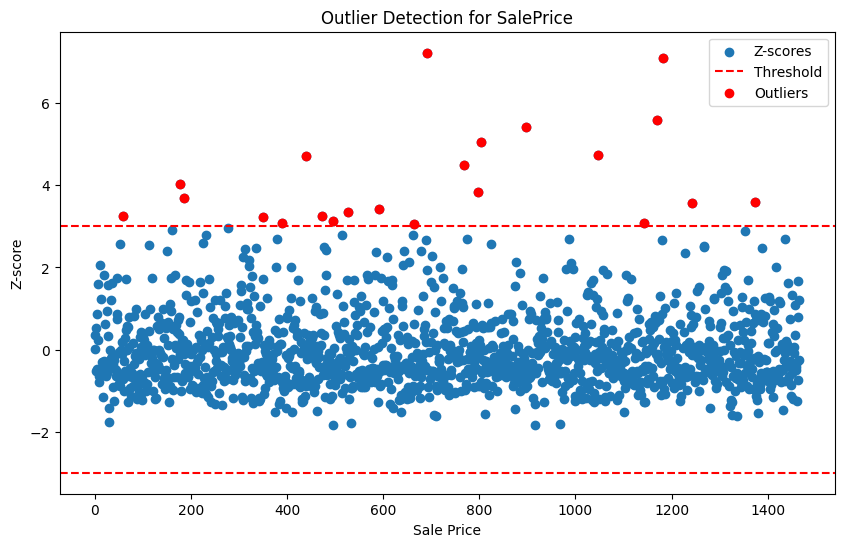

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(range(len(z_scores)), z_scores, label='Z-scores')
plt.axhline(y=threshold, color='r', linestyle='--', label='Threshold')
plt.axhline(y=-threshold, color='r', linestyle='--')
plt.scatter(outliers.index, z_scores[outliers.index], color='red', label='Outliers')

plt.xlabel('Sale Price')
plt.ylabel('Z-score')
plt.title(f'Outlier Detection for {column_name}')
plt.legend()
plt.show()


In [30]:

X = data_no_outliers[['MSSubClass','LotFrontage', 'LotArea','OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF','1stFlrSF', '2ndFlrSF','LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr','TotRmsAbvGrd', 'Fireplaces','GarageYrBlt','GarageCars', 'GarageArea','WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea','MiscVal', 'MoSold', 'YrSold']]
y = data_no_outliers['SalePrice']

rmse = model_eval(X,y)
print(f"Root Mean Squared Error (RMSE): {rmse}")
rmse_log['Outlier Detection using Zscore'] = rmse

Root Mean Squared Error (RMSE): (26138.041110869544, RandomForestRegressor(n_estimators=10, random_state=42))


### 7. Outlier detection for sales price using scatter plots

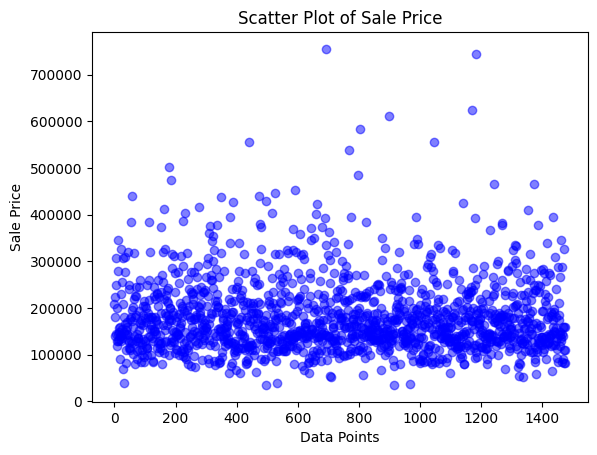

In [31]:
import matplotlib.pyplot as plt
plt.scatter(data.index, data['SalePrice'], alpha=0.5, color='blue')
plt.title('Scatter Plot of Sale Price')
plt.xlabel('Data Points')
plt.ylabel('Sale Price')
plt.show()


In [32]:
filtered_data = data[data['SalePrice'] > 600000]
filtered_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,6,1994,1995,Gable,WdShngl,HdBoard,HdBoard,BrkFace,1170.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1455,Unf,0,989,2444,GasA,Ex,Y,SBrkr,2444,1872,0,4316,0,1,3,1,4,1,Ex,10,Typ,2,Ex,Attchd,1994.0,Fin,3,832,TA,TA,Y,382,50,0,0,0,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000.0
898,899,20,RL,100.0,12919,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,9,5,2009,2010,Hip,CompShg,VinylSd,VinylSd,Stone,760.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2188,Unf,0,142,2330,GasA,Ex,Y,SBrkr,2364,0,0,2364,1,0,2,1,2,1,Ex,11,Typ,2,Gd,Attchd,2009.0,Fin,3,820,TA,TA,Y,0,67,0,0,0,0,NaN,NaN,NaN,0,3,2010,New,Partial,611657.0
1169,1170,60,RL,118.0,35760,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,5,1995,1996,Hip,CompShg,HdBoard,HdBoard,BrkFace,1378.0,Gd,Gd,PConc,Ex,TA,Gd,GLQ,1387,Unf,0,543,1930,GasA,Ex,Y,SBrkr,1831,1796,0,3627,1,0,3,1,4,1,Gd,10,Typ,1,TA,Attchd,1995.0,Fin,3,807,TA,TA,Y,361,76,0,0,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal,625000.0
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,5,1996,1996,Hip,CompShg,Wd Sdng,ImStucc,None,0.0,Gd,TA,PConc,Ex,TA,Av,GLQ,2096,Unf,0,300,2396,GasA,Ex,Y,SBrkr,2411,2065,0,4476,1,0,3,1,4,1,Ex,10,Typ,2,TA,Attchd,1996.0,Fin,3,813,TA,TA,Y,171,78,0,0,0,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000.0


##### Why is the sale price so high?
1. High Lot Size
2. TotalRmsAboveGround > 9

In [33]:
filtered_data2 = data[data['TotRmsAbvGrd'] > 9]

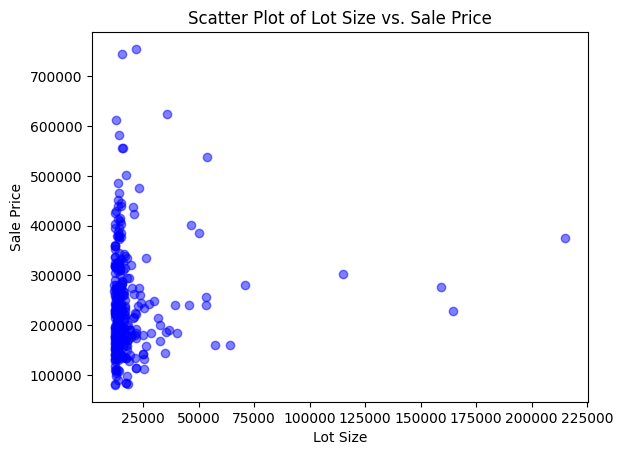

In [34]:
lotarea = data[data['LotArea'] > 12000]

plt.scatter(lotarea['LotArea'], lotarea['SalePrice'], alpha=0.5, color='blue')
plt.title('Scatter Plot of Lot Size vs. Sale Price')
plt.xlabel('Lot Size')
plt.ylabel('Sale Price')
plt.show()


####  Removing the outliers of Sale Price

In [35]:
filtered_data = data_null[data_null['SalePrice'] <= 600000]

In [36]:
X = filtered_data[['MSSubClass','LotFrontage', 'LotArea','OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF','1stFlrSF', '2ndFlrSF','LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr','TotRmsAbvGrd', 'Fireplaces','GarageYrBlt','GarageCars', 'GarageArea','WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea','MiscVal', 'MoSold', 'YrSold']]
y = filtered_data['SalePrice']

rmse = model_eval(X,y)
print(f"Root Mean Squared Error (RMSE): {rmse}")
# rmse_log.append(rmse)


Root Mean Squared Error (RMSE): (25929.811661883432, RandomForestRegressor(n_estimators=10, random_state=42))


* removing the outliers directly increased the error instead, so will try to limit the removal of outlier to 700K instead of 600K.

In [37]:
# data_5 = data_null[data_null['SalePrice'] <= 700000]
data_5 = data_null[data_null['SalePrice'] <= 500000]
X = data_5[['MSSubClass','LotFrontage', 'LotArea','OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF','1stFlrSF', '2ndFlrSF','LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr','TotRmsAbvGrd', 'Fireplaces','GarageYrBlt','GarageCars', 'GarageArea','WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea','MiscVal', 'MoSold', 'YrSold']]
y = data_5['SalePrice']

rmse = model_eval(X,y)
print(f"Root Mean Squared Error (RMSE): {rmse}")
rmse_log['Outlier Detection using Scatter Plots'] = rmse


Root Mean Squared Error (RMSE): (25725.319213650677, RandomForestRegressor(n_estimators=10, random_state=42))


In [38]:
rmse_log

{'Missing Values - Replacing with 0 ': (36272.41991870905,
  RandomForestRegressor(n_estimators=10, random_state=42)),
 'Missing Values - Replacing with Mean ': (30170.164257360982,
  RandomForestRegressor(n_estimators=10, random_state=42)),
 'Missing Values - Replacing with Median ': (32861.11903931157,
  RandomForestRegressor(n_estimators=10, random_state=42)),
 'Missing Values - ForwardFill ': (31011.60109722418,
  RandomForestRegressor(n_estimators=10, random_state=42)),
 'Missing Values - Chain Imputation ': (28129.814739261805,
  RandomForestRegressor(n_estimators=10, random_state=42)),
 'Removing duplicate data (100%)': (26364.04213768753,
  RandomForestRegressor(n_estimators=10, random_state=42)),
 'Outlier Detection using Zscore': (26138.041110869544,
  RandomForestRegressor(n_estimators=10, random_state=42)),
 'Outlier Detection using Scatter Plots': (25725.319213650677,
  RandomForestRegressor(n_estimators=10, random_state=42))}

### 8. Outlier detection  using KNN

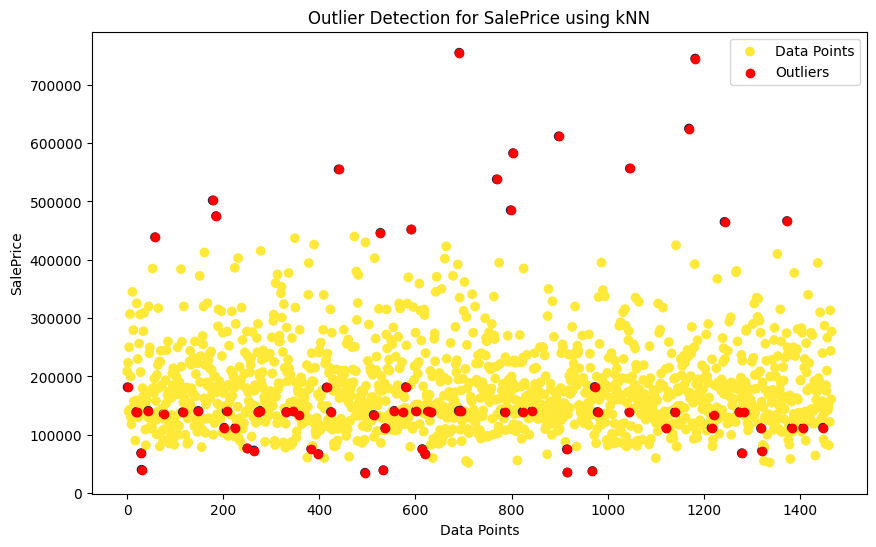

In [45]:
from sklearn.neighbors import LocalOutlierFactor

column_name = 'SalePrice'

data_to_check = data_null[[column_name]]

# LocalOutlierFactor for outlier detection
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
outlier_labels = lof.fit_predict(data_to_check)

# Identify outliers
outliers = data_null[outlier_labels == -1]

plt.figure(figsize=(10, 6))
plt.scatter(range(len(data_to_check)), data_to_check, c=outlier_labels, cmap='cividis', label='Data Points')
plt.scatter(outliers.index, data_to_check.loc[outliers.index], color='red', label='Outliers')

plt.xlabel('Data Points')
plt.ylabel(column_name)
plt.title(f'Outlier Detection for {column_name} using kNN')
plt.legend()

# Display the plot
plt.show()


In [40]:

# Remove outliers
data_no_outliers_knn = data_null[outlier_labels == 1]

# Define your features (X) and target variable (y) after removing outliers
X = data_no_outliers_knn[['MSSubClass','LotFrontage', 'LotArea','OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
                      'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF','1stFlrSF', '2ndFlrSF','LowQualFinSF',
                      'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
                      'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr','TotRmsAbvGrd', 'Fireplaces','GarageYrBlt',
                      'GarageCars', 'GarageArea','WoodDeckSF', 'OpenPorchSF',
                      'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea','MiscVal', 'MoSold', 'YrSold']]

y = data_no_outliers_knn['SalePrice']

rmse = model_eval(X,y)
print(f"Root Mean Squared Error (RMSE): {rmse}")
rmse_log['Outlier Detection using KNN'] = rmse


Root Mean Squared Error (RMSE): (23109.15952413834, RandomForestRegressor(n_estimators=10, random_state=42))


Outlier removal using KNN gives the best result,

### 9. Feature Selection - Trying to reduce the number of variables using Feature Importance


---

Feature importances are provided by the fitted attribute feature_importances_ and they are computed as the mean and standard deviation of accumulation of the impurity decrease within each tree.

- The dataset used is output after KNN outlier detection. We will remove the features that have the least importance value from the function!


In [46]:
rmse, rf_model = model_eval(X,y)
feature_importances = rf_model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)


          Feature  Importance
3     OverallQual    0.569378
14      GrLivArea    0.108298
7      BsmtFinSF1    0.040976
10    TotalBsmtSF    0.035272
2         LotArea    0.032092
25     GarageArea    0.030156
11       1stFlrSF    0.027306
24     GarageCars    0.021926
17       FullBath    0.020242
5       YearBuilt    0.017594
26     WoodDeckSF    0.012847
1     LotFrontage    0.010466
6    YearRemodAdd    0.009958
4     OverallCond    0.009407
9       BsmtUnfSF    0.008539
27    OpenPorchSF    0.006865
22     Fireplaces    0.006023
23    GarageYrBlt    0.005417
33         MoSold    0.004425
19   BedroomAbvGr    0.003457
15   BsmtFullBath    0.002731
12       2ndFlrSF    0.002620
20   KitchenAbvGr    0.002435
34         YrSold    0.002224
21   TotRmsAbvGrd    0.002158
0      MSSubClass    0.002153
18       HalfBath    0.001292
28  EnclosedPorch    0.000964
8      BsmtFinSF2    0.000846
30    ScreenPorch    0.000724
32        MiscVal    0.000305
29      3SsnPorch    0.000301
16   BsmtH

In [47]:
data_5 = data_no_outliers_knn.copy()

X = data_5[['MSSubClass','LotFrontage', 'LotArea','OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
                      'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF','1stFlrSF', '2ndFlrSF',
                      'GrLivArea', 'BsmtFullBath', 'FullBath',
                      'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr','TotRmsAbvGrd', 'Fireplaces','GarageYrBlt',
                      'GarageCars', 'GarageArea','WoodDeckSF', 'OpenPorchSF',
                      'EnclosedPorch', 'ScreenPorch','MiscVal', 'MoSold', 'YrSold']]

y = data_5['SalePrice']

rmse = model_eval(X,y)
print(f"Root Mean Squared Error (RMSE): {rmse}")
rmse_log['Feature Selection using Feature Importance (Random Forest)'] = rmse


Root Mean Squared Error (RMSE): (22990.08358575404, RandomForestRegressor(n_estimators=10, random_state=42))


Using this helped reduce the rmse score by almost 1000. There are several other feature selection techniques that can be used as there are a lot of variables in this dataset. (Will do that in the following steps)!

### 10. SaleCondition (Nominal Encoding)
Till now, the model contains only Numeric values, now adding **Sale Condition** column, which has Nominal Values.

---


SaleCondition: Condition of sale

---


      1.Normal	Normal Sale
      2.Abnorml	Abnormal Sale -  trade, foreclosure, short sale
      3.AdjLand	Adjoining Land Purchase
      4.Alloca	Allocation - two linked properties with separate deeds typically condo with a garage unit
      5.Family	Sale between family members
      6.Partial	Home was not completed when last assessed (associated with New Homes)




In [49]:
data['SaleCondition'].unique()

array(['Normal', 'Abnorml', 'Partial', 'AdjLand', 'Alloca', 'Family'],
      dtype=object)

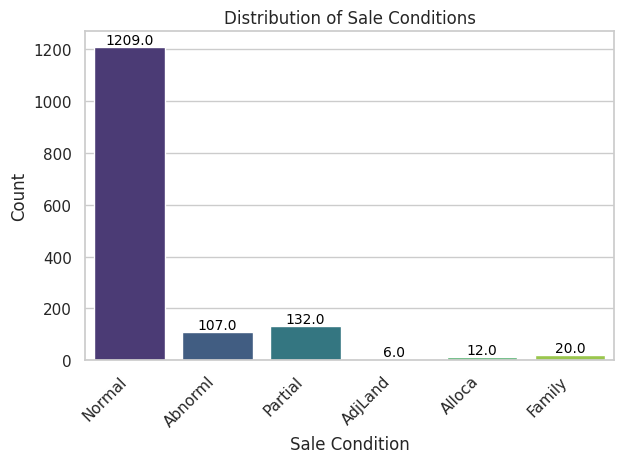

In [56]:
sns.set(style="whitegrid")
ax = sns.countplot(data=data, x='SaleCondition', palette="viridis")
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=10, color='black')
ax.set(xlabel='Sale Condition', ylabel='Count', title='Distribution of Sale Conditions')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.tight_layout()
plt.show()


In [51]:

data_5['SaleCondition'] = data_5['SaleCondition'].astype('category').cat.codes


In [53]:
X = data_5[['MSSubClass','LotFrontage', 'LotArea','OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
                      'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF','1stFlrSF', '2ndFlrSF',
                      'GrLivArea', 'BsmtFullBath', 'FullBath',
                      'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr','TotRmsAbvGrd', 'Fireplaces','GarageYrBlt',
                      'GarageCars', 'GarageArea','WoodDeckSF', 'OpenPorchSF',
                      'EnclosedPorch', 'ScreenPorch','MiscVal', 'MoSold', 'YrSold','SaleCondition']]

y = data_5['SalePrice']


rmse = model_eval(X,y)
print(f"Root Mean Squared Error (RMSE): {rmse}")
rmse_log['Nominal Encoding'] = rmse


Root Mean Squared Error (RMSE): (23801.074325487923, RandomForestRegressor(n_estimators=10, random_state=42))


## Note


---

When I used just outlier detection using Scatter plot & then feature selection based on that output, *the result was different!*  (Better for nominal encoding)

But applying Nominal Encoding on the data which used KNN for outlier detection, for some results does not give the best result !
Hence, sometimes the order and previous steps can be a good factor to decide which method to use or not to use!


### 11. - Feature Transformation - Binning for YearBuilt



---
The year built column has a high variance of 917, so using feature transformation technique - binning, diving the values into 5 bins will help reduce the variance and then the generalization power of the algorithm. The RMSE scored decreased from 101146 to 100977.
 - Tried the following values for bins 3,5,7. 5 gave the best results



In [60]:
data_5['YearBuilt'].var()

901.7928775651658

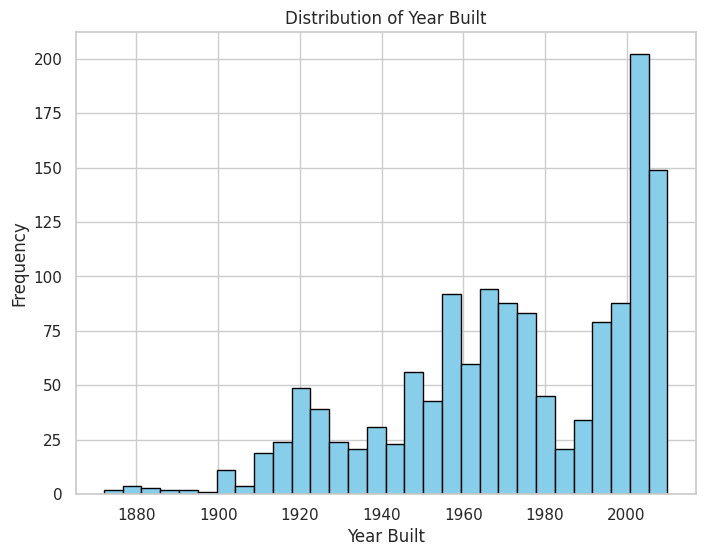

In [61]:
plt.figure(figsize=(8, 6))
plt.hist(data_5['YearBuilt'], bins=30, color='skyblue', edgecolor='black')  # Adjust the number of bins as needed
plt.xlabel('Year Built')
plt.ylabel('Frequency')
plt.title('Distribution of Year Built')
plt.show()


In [62]:
print(data_5['YearBuilt'].min())
print(data_5['YearBuilt'].max())

1872.0
2010.0


In [63]:
import pandas as pd
import numpy as np

num_bins = 9

bin_edges = np.linspace(1871, 2011, num=num_bins + 1)

# Generating bin labels
bin_labels = list(range(1, num_bins + 1))

data_6 = data_5.copy()
data_6['YearBuiltCategory'] = pd.cut(data_6['YearBuilt'], bins=bin_edges, labels=bin_labels, include_lowest=True)



In [64]:
X = data_6[['MSSubClass','LotFrontage', 'LotArea','OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF','1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr','TotRmsAbvGrd', 'Fireplaces','GarageYrBlt','GarageCars', 'GarageArea','WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'ScreenPorch','MiscVal', 'MoSold', 'YrSold','YearBuiltCategory']]
y = data_6['SalePrice']

rmse = model_eval(X,y)
print(f"Root Mean Squared Error (RMSE): {rmse}")
rmse_log['Feature Transformation - Binning'] = rmse


Root Mean Squared Error (RMSE): (23574.915330344233, RandomForestRegressor(n_estimators=10, random_state=42))


In [65]:
rmse_log

{'Missing Values - Replacing with 0 ': (36272.41991870905,
  RandomForestRegressor(n_estimators=10, random_state=42)),
 'Missing Values - Replacing with Mean ': (30170.164257360982,
  RandomForestRegressor(n_estimators=10, random_state=42)),
 'Missing Values - Replacing with Median ': (32861.11903931157,
  RandomForestRegressor(n_estimators=10, random_state=42)),
 'Missing Values - ForwardFill ': (31011.60109722418,
  RandomForestRegressor(n_estimators=10, random_state=42)),
 'Missing Values - Chain Imputation ': (28129.814739261805,
  RandomForestRegressor(n_estimators=10, random_state=42)),
 'Removing duplicate data (100%)': (26364.04213768753,
  RandomForestRegressor(n_estimators=10, random_state=42)),
 'Outlier Detection using Zscore': (26138.041110869544,
  RandomForestRegressor(n_estimators=10, random_state=42)),
 'Outlier Detection using Scatter Plots': (25725.319213650677,
  RandomForestRegressor(n_estimators=10, random_state=42)),
 'Outlier Detection using KNN': (23109.1595241

**Note 2** -
When I used Binning with different bins - there was a huge difference in the rmse score. This is the best output.

Moreover, using the SAME method for binning but a different dataset which used Nominal Encoding for Sale Condition, Scatter plot range for outlier detection (which previously gave better results for nominal encoding) increased the rms error score!

23681 for scatter plots and nominal encoding used

### 12.  Ordinal Encoding - For KitchenQual Nominal Variable

In [66]:
data_7 = data_6.copy()
data_7['KitchenQual'].unique()

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

In [67]:
ordinal_enc = {
    'Gd': 2,
    'TA': 3,
    'Ex': 1,
    'Fa': 4,
}

data_7['KitchenQual'] = data_7['KitchenQual'].replace(ordinal_enc)

In [68]:
X = data_7[['MSSubClass','LotFrontage', 'LotArea','OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF','1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr','TotRmsAbvGrd', 'Fireplaces','GarageYrBlt','GarageCars', 'GarageArea','WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'ScreenPorch','MiscVal', 'MoSold', 'YrSold','YearBuiltCategory', 'KitchenQual']]
y = data_7['SalePrice']

rmse = model_eval(X,y)
print(f"Root Mean Squared Error (RMSE): {rmse}")
rmse_log['Feature Transformation - Binning'] = rmse


rmse = model_eval(X,y)
print(f"Root Mean Squared Error (RMSE): {rmse}")
rmse_log['Feature Transformation - Ordinal Encoding'] = rmse


Root Mean Squared Error (RMSE): (22324.704881135487, RandomForestRegressor(n_estimators=10, random_state=42))
Root Mean Squared Error (RMSE): (22324.704881135487, RandomForestRegressor(n_estimators=10, random_state=42))


In [69]:
rmse_log

{'Missing Values - Replacing with 0 ': (36272.41991870905,
  RandomForestRegressor(n_estimators=10, random_state=42)),
 'Missing Values - Replacing with Mean ': (30170.164257360982,
  RandomForestRegressor(n_estimators=10, random_state=42)),
 'Missing Values - Replacing with Median ': (32861.11903931157,
  RandomForestRegressor(n_estimators=10, random_state=42)),
 'Missing Values - ForwardFill ': (31011.60109722418,
  RandomForestRegressor(n_estimators=10, random_state=42)),
 'Missing Values - Chain Imputation ': (28129.814739261805,
  RandomForestRegressor(n_estimators=10, random_state=42)),
 'Removing duplicate data (100%)': (26364.04213768753,
  RandomForestRegressor(n_estimators=10, random_state=42)),
 'Outlier Detection using Zscore': (26138.041110869544,
  RandomForestRegressor(n_estimators=10, random_state=42)),
 'Outlier Detection using Scatter Plots': (25725.319213650677,
  RandomForestRegressor(n_estimators=10, random_state=42)),
 'Outlier Detection using KNN': (23109.1595241

### Log Check


In [532]:
rmse_log

{'Missing Values - Replacing with 0 ': (36272.41991870905,
  RandomForestRegressor(n_estimators=10, random_state=42)),
 'Missing Values - Replacing with Mean ': (30170.164257360982,
  RandomForestRegressor(n_estimators=10, random_state=42)),
 'Missing Values - Replacing with Median ': (32861.11903931157,
  RandomForestRegressor(n_estimators=10, random_state=42)),
 'Missing Values - ForwardFill ': (31011.60109722418,
  RandomForestRegressor(n_estimators=10, random_state=42)),
 'Missing Values - Chain Imputation ': (28129.814739261805,
  RandomForestRegressor(n_estimators=10, random_state=42)),
 'Removing duplicate data (100%)': (26364.04213768753,
  RandomForestRegressor(n_estimators=10, random_state=42)),
 'Outlier Detection using Zscore': (26138.041110869544,
  RandomForestRegressor(n_estimators=10, random_state=42)),
 'Outlier Detection using Scatter Plots': (25725.319213650677,
  RandomForestRegressor(n_estimators=10, random_state=42)),
 'Outlier Detection using KNN': (23109.1595241

### 13. Nominal Encoding - 0/1 Binary - PoolQual

In house prices, in general the cost of houses increases if it has a pool. So going to convert the categorical column into Y/N column.



In [71]:
data_8 = data_7.copy()
data_8['PoolQC'].unique()

array([nan, 'Ex', 'Fa', 'Gd'], dtype=object)

The value 0 was initially a NaN value -which was originally NA in the excel dataset. But due to python specifications, it became a null value.
The NA value according to the dataset description was - Not Applicable/No Pool.

Will use this 0 as no pool and 1 for pool.

In [72]:
data_8['PoolQC'] = data_8['PoolQC'].replace(['Ex', 'Fa', 'Gd'], 1)
data_8['PoolQC'] = data_8['PoolQC'].fillna(0)
X = data_8[['MSSubClass','LotFrontage', 'LotArea','OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF','1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr','TotRmsAbvGrd', 'Fireplaces','GarageYrBlt','GarageCars', 'GarageArea','WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'ScreenPorch','MiscVal', 'MoSold', 'YrSold','YearBuiltCategory', 'KitchenQual', 'PoolQC']]
y = data_8['SalePrice']

rmse = model_eval(X,y)
print(f"Root Mean Squared Error (RMSE): {rmse}")
rmse_log['Feature Transformation - Using Categorical Threshold'] = rmse


Root Mean Squared Error (RMSE): (22484.955955636342, RandomForestRegressor(n_estimators=10, random_state=42))


This increases the RMSE score insead - will look at the distribution of the values

In [73]:
data_8['PoolQC'].value_counts()

#Since it is an unbalanced dataset, it reduces generalization power of th model.

0.0    1387
1.0       6
Name: PoolQC, dtype: int64

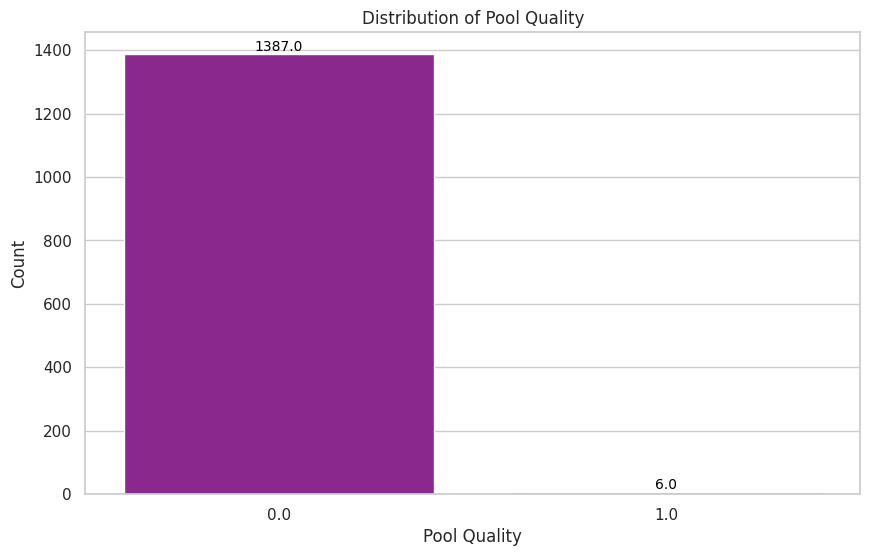

In [78]:

plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
colors = sns.color_palette('plasma', n_colors=len(data_8['PoolQC'].unique()))
ax = sns.countplot(data=data_8, x='PoolQC', palette=colors)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=10, color='black')

plt.xlabel('Pool Quality')
plt.ylabel('Count')
plt.title('Distribution of Pool Quality')
plt.show()


In [75]:
data_8.shape

(1393, 82)

Since its a highly unbalanced variable - adding it to the dataset is going to mess up the RMSE vals.

This shows that, what might work on one variable, might not work for another variable. Looking at the distribution of values helped understand the information it gives. This dataset has a low variance, and less infomation gain, so it just did not help in machine understanding.

Similarly, not using this variable improves the machine understanding. But it also helped REDUCE the extra features, i.e there are other features like PoolArea, which will be irrelevant to this dataset!

### 14. MSZoning - Ordinal Encoding

This dataset contains a lot of categorical variables, and there are few methods that are used for categorical variables.

Description
MSZoning: Identifies the general zoning classification of the sale.

       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park
       RM	Residential Medium Density

In [79]:
data_11 = data_7.copy()
data_11['MSZoning'].unique()

array(['RL', 'RM', 'FV', 'C (all)', 'RH'], dtype=object)

In [80]:
mapping = {
    'A': '0',
    'C (all)': '1',
    'FV': '2',
    'I': '3',
    'RH': '4',
    'RL': '5',
    'RP': '6',
    'RM': '7'}

# Map the values in the 'MSZoning' column to the new categories
data_11['MSZoning'] = data_11['MSZoning'].map(mapping)
X = data_11[['MSSubClass','LotFrontage', 'LotArea','OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF','1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr','TotRmsAbvGrd', 'Fireplaces','GarageYrBlt','GarageCars', 'GarageArea','WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'ScreenPorch','MiscVal', 'MoSold', 'YrSold','YearBuiltCategory', 'KitchenQual','MSZoning']]
y = data_11['SalePrice']

rmse = model_eval(X,y)
print(f"Root Mean Squared Error (RMSE): {rmse}")
rmse_log['Feature Transformation using Ordinal Encoding (II)'] = rmse



Root Mean Squared Error (RMSE): (22633.507028139873, RandomForestRegressor(n_estimators=10, random_state=42))


### 15.One Hot Encoding for MSZoning



       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park
       RM	Residential Medium Density

In [82]:
data_10 = data_7.copy()
data_10['MSZoning'].unique()

array(['RL', 'RM', 'FV', 'C (all)', 'RH'], dtype=object)

Since Floating Village is a residential property type - but its prices vary greatly from other residential properties - we will use it as a seprate category instead.

In [83]:
mapping = {
    'A': 'Agriculture',
    'C (all)': 'Commercial',
    'FV': 'Residential',
    'I': 'Commercial',
    'RH': 'Residential',
    'RL': 'Residential',
    'RP': 'Residential',
    'RM': 'Residential',
    0 : 'Residential'
}

# Map the values in the 'MSZoning' column to the new categories
data_10['MSZoning'] = data_10['MSZoning'].map(mapping)

# Perform one-hot encoding on the 'MSZoning' column
data_10 = pd.get_dummies(data_10, columns=['MSZoning'], prefix='MSZoning')



In [84]:
data_10.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice', 'Id', 'Street', 'Alley', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electric

In [85]:

X = data_10[['MSSubClass','LotFrontage', 'LotArea','OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF','1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr','TotRmsAbvGrd', 'Fireplaces','GarageYrBlt','GarageCars', 'GarageArea','WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'ScreenPorch','MiscVal', 'MoSold', 'YrSold','YearBuiltCategory', 'KitchenQual','MSZoning_Commercial', 'MSZoning_Residential']]
y = data_10['SalePrice']

rmse = model_eval(X,y)
print(f"Root Mean Squared Error (RMSE): {rmse}")
rmse_log['Feature Transformation using One Hot Encoding'] = rmse




Root Mean Squared Error (RMSE): (22135.80439408085, RandomForestRegressor(n_estimators=10, random_state=42))


#### **Note**

for MSZoning - Trying both Encoding and One Hot Encoding, using One Hot Encoding gave better results!


---


But, when we used a greater number of categorials (3 for residential and 2 for commericial) it increased the error. This was the best result.

### 16. - Box Cox Transformation for Highly Skewed Variables - LotArea

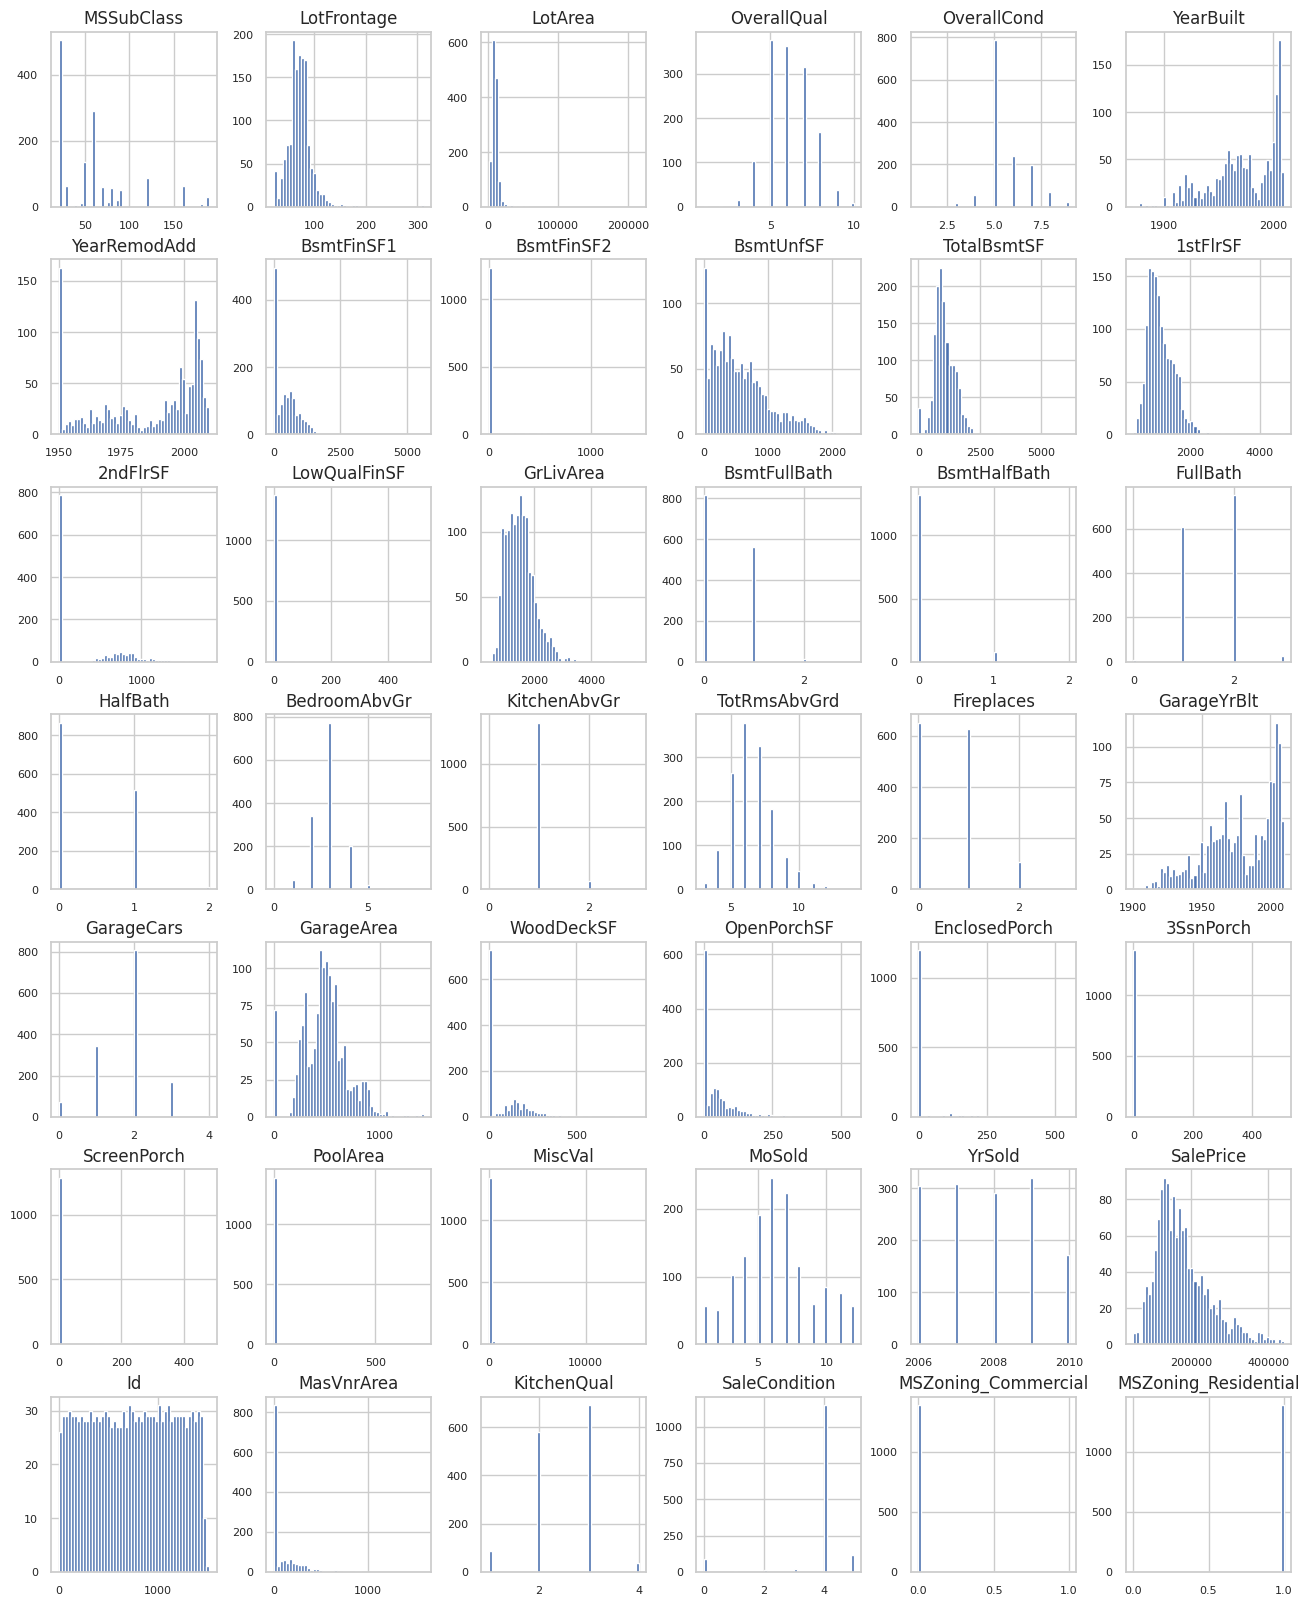

In [86]:
data_10.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);


In [87]:
from scipy.stats import boxcox
data_14= data_10.copy()
data_14['LotFrontage'], best_lambda = boxcox(data_14['LotFrontage'])

X = data_14[['MSSubClass','LotFrontage', 'LotArea','OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF','1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr','TotRmsAbvGrd', 'Fireplaces','GarageYrBlt','GarageCars', 'GarageArea','WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'ScreenPorch','MiscVal', 'MoSold', 'YrSold','YearBuiltCategory', 'KitchenQual','MSZoning_Commercial', 'MSZoning_Residential']]
y = data_14['SalePrice']

rmse = model_eval(X,y)
print(f"Root Mean Squared Error (RMSE): {rmse}")
rmse_log['Feature Transformation using Box Cox Transformation'] = rmse



Root Mean Squared Error (RMSE): (22113.47166656379, RandomForestRegressor(n_estimators=10, random_state=42))


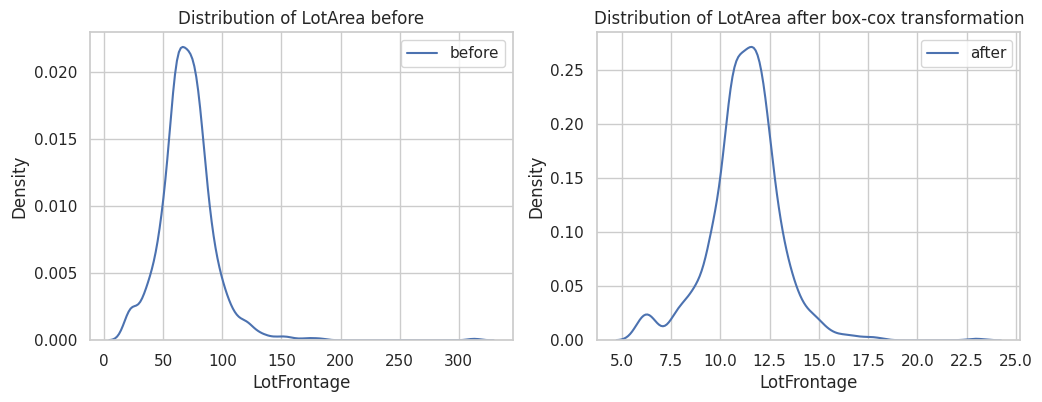

In [88]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.distplot(data_10['LotFrontage'], hist=False, kde=True, ax=axes[0], label='before')
sns.distplot(data_14['LotFrontage'], hist=False, kde=True, ax=axes[1], label='after')

axes[0].set_xlabel('LotFrontage')
axes[0].set_title('Distribution of LotArea before')
axes[1].set_xlabel('LotFrontage')
axes[1].set_title('Distribution of LotArea after box-cox transformation')

axes[0].legend()
axes[1].legend()

plt.show()

### 17. Log Transformation for LogArea

Since it has a severly positive skewed distribution, instead of using Box-Cox transformation, we will try and use Log Transformation if it gives better eesults

Note - Is often used where the data has a severe positively skewed distribution ( Lmbda = 0)

In [89]:
import numpy as np

data_14 = data_10.copy()
data_14['LotArea'] = np.log1p(data_10['LotArea'])


X = data_14[['MSSubClass','LotFrontage', 'LotArea','OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF','1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr','TotRmsAbvGrd', 'Fireplaces','GarageYrBlt','GarageCars', 'GarageArea','WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'ScreenPorch','MiscVal', 'MoSold', 'YrSold','YearBuiltCategory', 'KitchenQual','MSZoning_Commercial', 'MSZoning_Residential']]
y = data_14['SalePrice']

rmse = model_eval(X, y)
print(f"Root Mean Squared Error (RMSE): {rmse}")
rmse_log['Feature Transformation using Log Transformation'] = rmse


Root Mean Squared Error (RMSE): (22089.58194349187, RandomForestRegressor(n_estimators=10, random_state=42))


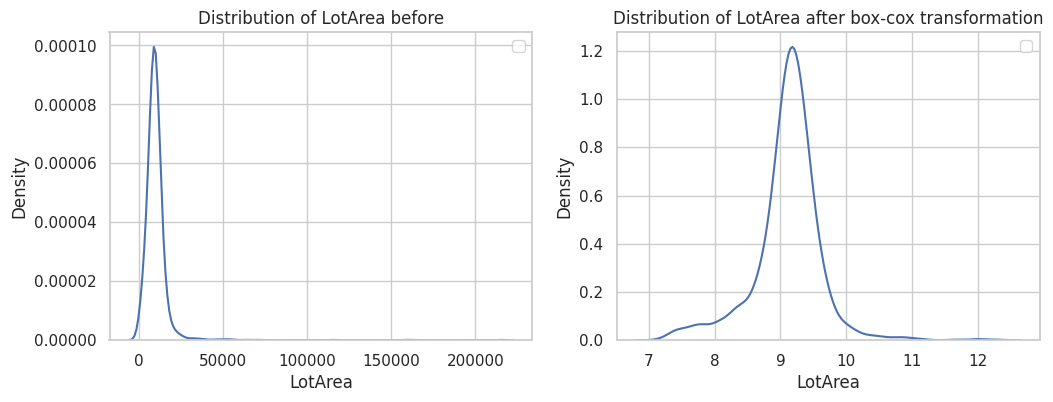

In [90]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.distplot(data_10['LotArea'], hist=False, kde=True, ax=axes[0])
sns.distplot(data_14['LotArea'], hist=False, kde=True, ax=axes[1])

axes[0].set_xlabel('LotArea')
axes[0].set_title('Distribution of LotArea before')
axes[1].set_xlabel('LotArea')
axes[1].set_title('Distribution of LotArea after box-cox transformation')

axes[0].legend()
axes[1].legend()

plt.show()

Using log transformation we can reduce the root mean square error value, which makes sense because log transformation is more effective for highly positive skewed data!

### 18. Standardization using MinMax and Standard Scaler for GrLivArea

<Axes: xlabel='GrLivArea', ylabel='Density'>

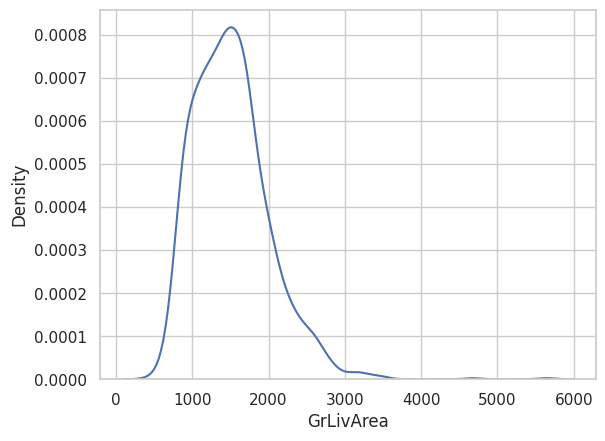

In [91]:
data_16 = data_14.copy()
sns.distplot(data_14['GrLivArea'], hist=False, kde=True)

<Axes: xlabel='GrLivArea', ylabel='Density'>

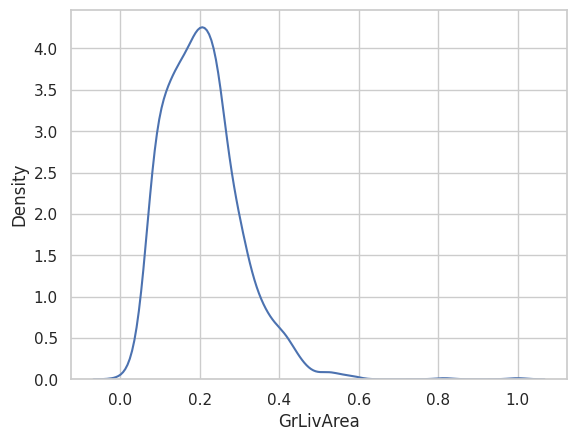

In [92]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler


# Create a StandardScaler instance
scaler2 = MinMaxScaler()
# Fit and transform the 'GrLivArea' column to standardize it
data_16['GrLivArea'] = scaler2.fit_transform(data_16[['GrLivArea']])
sns.distplot(data_16['GrLivArea'], hist=False, kde=True)

In [93]:

X =data_16[['MSSubClass','LotFrontage', 'LotArea','OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF','1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr','TotRmsAbvGrd', 'Fireplaces','GarageYrBlt','GarageCars', 'GarageArea','WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'ScreenPorch','MiscVal', 'MoSold', 'YrSold','YearBuiltCategory', 'KitchenQual','MSZoning_Commercial', 'MSZoning_Residential']]
y = data_16['SalePrice']

rmse = model_eval(X,y)
print(f"Root Mean Squared Error (RMSE): {rmse}")
rmse_log['Feature Transformation using MinMax Scaler'] = rmse



Root Mean Squared Error (RMSE): (22089.58194349187, RandomForestRegressor(n_estimators=10, random_state=42))


### 19. Standard Scaling for GrLivArea


In [94]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

data_standard = data_14.copy()
scaler = StandardScaler()
data_standard['GrLivArea'] = scaler.fit_transform(data_standard[['GrLivArea']])



In [95]:

X = data_standard[['MSSubClass','LotFrontage', 'LotArea','OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF','1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr','TotRmsAbvGrd', 'Fireplaces','GarageYrBlt','GarageCars', 'GarageArea','WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'ScreenPorch','MiscVal', 'MoSold', 'YrSold','YearBuiltCategory', 'KitchenQual','MSZoning_Commercial', 'MSZoning_Residential']]

y = data_standard['SalePrice']

rmse = model_eval(X,y)
print(f"Root Mean Squared Error (RMSE): {rmse}")
rmse_log['Feature Transformation using Standard Scaler'] = rmse



Root Mean Squared Error (RMSE): (22089.58194349187, RandomForestRegressor(n_estimators=10, random_state=42))


Since we are not just changing the range of the distribution - its not affected the distribution of the GrLivArea column.
Using it does decrease the rmse score, and further more using Standard Scaler instead of MinMax gives worse results compartively - so going to use MinMax Scaler!

### 20. Feature Contraction using Algebraic Operations



In [96]:
data_new = data_16.copy()


In [97]:
data_new[['BsmtQual', 'BsmtCond','HeatingQC','FireplaceQu','GarageQual', 'GarageCond']].head(10)

,BsmtQual,BsmtCond,HeatingQC,FireplaceQu,GarageQual,GarageCond
0,Gd,TA,Ex,NaN,TA,TA
2,Gd,TA,Ex,TA,TA,TA
3,TA,Gd,Gd,Gd,TA,TA
4,Gd,TA,Ex,TA,TA,TA
5,Gd,TA,Ex,NaN,TA,TA
6,Ex,TA,Ex,Gd,TA,TA
7,Gd,TA,Ex,TA,TA,TA
8,TA,TA,Gd,TA,Fa,TA
9,TA,TA,Ex,TA,Gd,TA
10,TA,TA,Ex,NaN,TA,TA


In [98]:
columns_to_replace = ['BsmtQual', 'BsmtCond', 'HeatingQC', 'FireplaceQu']
for i in columns_to_replace:
  print(data_new[i].value_counts())

Gd    611
TA    610
Ex    109
Fa     29
Name: BsmtQual, dtype: int64
TA    1250
Gd      64
Fa      44
Po       1
Name: BsmtCond, dtype: int64
Ex    709
TA    405
Gd    234
Fa     44
Po      1
Name: HeatingQC, dtype: int64
Gd    362
TA    306
Fa     33
Ex     23
Po     17
Name: FireplaceQu, dtype: int64


Ex - Excellent
Gd - Good
TA - Average
Fa - Fair
NA/Nan - Not Applicable

So will combine all these columns as 1 and try to reduce the number of features in general

In [99]:
mapping = {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'NA': 0, 'Nan': 0}

columns_to_replace = ['BsmtQual', 'HeatingQC', 'FireplaceQu']
data_new[columns_to_replace] = data_new[columns_to_replace].replace(mapping)
data_new[columns_to_replace] = data_new[columns_to_replace].fillna(method = 'ffill')


In [100]:
# Calculate the average rating for the selected columns and add a new 'AverageRating' column
data_new['AverageRating'] = data_new[columns_to_replace].mean(axis=1)


In [101]:
data_new['AverageRating'].isna().sum()

0

In [102]:
X =data_new[['MSSubClass','LotFrontage', 'LotArea','OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF','1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr','TotRmsAbvGrd', 'Fireplaces','GarageYrBlt','GarageCars', 'GarageArea','WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'ScreenPorch','MiscVal', 'MoSold', 'YrSold','YearBuiltCategory', 'KitchenQual','MSZoning_Commercial', 'MSZoning_Residential', 'AverageRating']]
y = data_new['SalePrice']

rmse = model_eval(X,y)
print(f"Root Mean Squared Error (RMSE): {rmse}")
rmse_log['Feature Contraction using Algebraic Operations'] = rmse


Root Mean Squared Error (RMSE): (22552.754071796116, RandomForestRegressor(n_estimators=10, random_state=42))


In [103]:
rmse_log

{'Missing Values - Replacing with 0 ': (36272.41991870905,
  RandomForestRegressor(n_estimators=10, random_state=42)),
 'Missing Values - Replacing with Mean ': (30170.164257360982,
  RandomForestRegressor(n_estimators=10, random_state=42)),
 'Missing Values - Replacing with Median ': (32861.11903931157,
  RandomForestRegressor(n_estimators=10, random_state=42)),
 'Missing Values - ForwardFill ': (31011.60109722418,
  RandomForestRegressor(n_estimators=10, random_state=42)),
 'Missing Values - Chain Imputation ': (28129.814739261805,
  RandomForestRegressor(n_estimators=10, random_state=42)),
 'Removing duplicate data (100%)': (26364.04213768753,
  RandomForestRegressor(n_estimators=10, random_state=42)),
 'Outlier Detection using Zscore': (26138.041110869544,
  RandomForestRegressor(n_estimators=10, random_state=42)),
 'Outlier Detection using Scatter Plots': (25725.319213650677,
  RandomForestRegressor(n_estimators=10, random_state=42)),
 'Outlier Detection using KNN': (23109.1595241

### 21. Feature Contraction using PCA

Since there a lot of dimensions still, using PCA can help as a technique in Feature Contraction.
PCA is more geared towards human understanding, however, in some instances it can help to improve machine understanding.


In [117]:
X = data_new[['MSSubClass','LotFrontage', 'LotArea','OverallQual', 'OverallCond', 'YearBuiltCategory', 'YearRemodAdd',
'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF','1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr','TotRmsAbvGrd', 'Fireplaces','GarageYrBlt','GarageCars', 'GarageArea','WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch','MiscVal', 'MoSold', 'YrSold','SaleCondition','KitchenQual', 'MSZoning_Commercial',
       'MSZoning_Residential']]
y = data_new['SalePrice']


from sklearn.feature_selection import SequentialFeatureSelector

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.decomposition import PCA

# Make an instance of the Model
pca = PCA(.99)
pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)



In [120]:
rf_model = RandomForestRegressor(n_estimators=10, random_state=42)  # You can adjust the hyperparameters

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(rmse)
rmse_log['Feature Selection using PCA'] = rmse


34543.12093896065


Overhere, I tried to to retain *90,95 and 99% of the original variance* in the distribution. keeping 99 gave the best results but did not imrpove the model performance

### 22. - Feature Selection using Sequential Forward Generation

In [121]:
def model_eval2(X,y):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create a Random Forest regressor
    rf_model = RandomForestRegressor(n_estimators=10, random_state=42)  # You can adjust the hyperparameters

    return rf_model


In [122]:
from sklearn.feature_selection import SequentialFeatureSelector

rf_model = model_eval2(X,y)
sfs = SequentialFeatureSelector(rf_model, n_features_to_select='auto',direction='forward')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sfs.fit(X_train,y_train)
sfs.get_support()
sfs.transform(X).shape

(1393, 18)

In [123]:
selected_features = sfs.get_support()
print('The selected features are:', list(X.columns[selected_features]))



The selected features are: ['LotArea', 'OverallQual', 'OverallCond', 'YearBuiltCategory', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'Fireplaces', 'GarageCars', 'EnclosedPorch', 'SaleCondition', 'KitchenQual']


In [124]:

X = data_new[['MSSubClass', 'OverallQual', 'YearRemodAdd', 'BsmtFinSF1', 'GrLivArea', 'Fireplaces', 'GarageCars']]
y = data_new['SalePrice']

rmse = model_eval(X,y)
print(f"Root Mean Squared Error (RMSE): {rmse}")
rmse_log['Feature Selection using SFG'] = rmse




Root Mean Squared Error (RMSE): (23579.016794603252, RandomForestRegressor(n_estimators=10, random_state=42))


### 23. Feature Selection using Sequential backward Generation

In [125]:
from sklearn.feature_selection import SequentialFeatureSelector

rf_model = model_eval2(X,y)
sfs = SequentialFeatureSelector(rf_model, n_features_to_select='auto',direction='backward')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sfs.fit(X_train,y_train)
sfs.get_support()
sfs.transform(X).shape
selected_features = sfs.get_support()
print('The selected features are:', list(X.columns[selected_features]))



The selected features are: ['OverallQual', 'YearRemodAdd', 'BsmtFinSF1', 'GrLivArea']


In [126]:

X = data_new[['OverallQual', 'YearRemodAdd', 'BsmtFinSF1', 'GrLivArea']]
y = data_new['SalePrice']

rmse = model_eval(X,y)
print(f"Root Mean Squared Error (RMSE): {rmse}")
rmse_log['Feature Selection using SBG'] = rmse




Root Mean Squared Error (RMSE): (27060.5788767019, RandomForestRegressor(n_estimators=10, random_state=42))


### 24. Feature Contraction using Isomaps

In [127]:
from sklearn.manifold import Isomap # for Isomap dimensionality reduction


In [128]:
X.shape

(1393, 4)

In [129]:
embed3 = Isomap(n_neighbors=5, # default=5, algorithm finds local structures based on the nearest neighbors
n_components=5, # number of dimensions
eigen_solver='auto', # {‘auto’, ‘arpack’, ‘dense’}, default=’auto’
tol=0, # default=0, Convergence tolerance passed to arpack or lobpcg. not used if eigen_solver == ‘dense’.
max_iter=None, # default=None, Maximum number of iterations for the arpack solver. not used if eigen_solver == ‘dense’.
path_method='auto', # {‘auto’, ‘FW’, ‘D’}, default=’auto’, Method to use in finding shortest path.
neighbors_algorithm='auto', # neighbors_algorithm{‘auto’, ‘brute’, ‘kd_tree’, ‘ball_tree’}, default=’auto’
n_jobs=-1, # n_jobsint or None, default=None, The number of parallel jobs to run. -1 means using all processors
metric='minkowski', # string, or callable, default=”minkowski”
p=2, # default=2, Parameter for the Minkowski metric. When p = 1, this is equivalent to using manhattan_distance (l1), and euclidean_distance (l2) for p = 2
metric_params=None) # default=None, Additional keyword arguments for the metric function.)

In [130]:
X_isomaps = embed3.fit_transform(X)### Step 3 - Print shape to test
print('The new shape of X: ',X_isomaps.shape)

The new shape of X:  (1393, 5)


In [131]:
X_isomaps.shape

(1393, 5)

In [132]:
rmse = model_eval(X_isomaps,y)
print(f"Root Mean Squared Error (RMSE): {rmse}")
rmse_log['Feature Selection using Isomaps'] = rmse


Root Mean Squared Error (RMSE): (49575.98535860957, RandomForestRegressor(n_estimators=10, random_state=42))


In [134]:
embed4 = Isomap(n_neighbors=10, # default=5, algorithm finds global structures based on the nearest neighbors
n_components=15, # number of dimensions
eigen_solver='auto', # {‘auto’, ‘arpack’, ‘dense’}, default=’auto’
tol=0, # default=0,
max_iter=200, # default=None, Maximum number of iterations for the arpack solver. not used if eigen_solver == ‘dense’.
path_method='D', # {‘auto’, ‘FW’, ‘D’}, default=’auto’, Method to use in finding shortest path.
neighbors_algorithm='kd_tree', # neighbors_algorithm{‘auto’, ‘brute’, ‘kd_tree’, ‘ball_tree’}, default=’auto’
n_jobs=-1, # n_jobsint or None, default=None, The number of parallel jobs to run. -1 means using all processors
metric='minkowski', # string, or callable, default=”minkowski”
p=1, # default=2, Parameter for the Minkowski metric. When p = 1, this is equivalent to using manhattan_distance (l1), and euclidean_distance (l2) for p = 2
metric_params=None) # default=None, Additional keyword arguments for the metric function.)


X_new = embed4.fit_transform(X)### Step 3 - Print shape to test
print('The new shape of X: ',X_new.shape)


rmse = model_eval(X_new,y)
print(f"Root Mean Squared Error (RMSE): {rmse}")
rmse_log['Feature Selection using Isomaps 2'] = rmse


The new shape of X:  (1393, 15)
Root Mean Squared Error (RMSE): (47816.16657841129, RandomForestRegressor(n_estimators=10, random_state=42))


### 25. Feature Contraction using MDS


In [135]:
from sklearn.manifold import MDS # for MDS dimensionality reduction
model2d=MDS(n_components=10,
          metric=True,
          n_init=4,
          max_iter=300,
          verbose=0,
          eps=0.001,
          n_jobs=None,
          random_state=42,
          dissimilarity='euclidean')

X_trans = model2d.fit_transform(X)

print('The new shape of X: ',X_trans.shape)
print('No. of Iterations: ', model2d.n_iter_)


The new shape of X:  (1393, 10)
No. of Iterations:  300


In [136]:
X_trans.shape

(1393, 10)

In [137]:

rmse = model_eval(X_trans,y)
print(f"Root Mean Squared Error (RMSE): {rmse}")
rmse_log['Feature Selection using MDS'] = rmse


Root Mean Squared Error (RMSE): (51671.07745335913, RandomForestRegressor(n_estimators=10, random_state=42))


### 26.Feature Contraction & Label Encoding for nominal variables

The dataset contains 3 variables which relate to the utilities present in the house, so I will combine these 3 and use label encoding to get a single column with unique values of these combination & see if it more sense to the machine.

This way, it might get more information gain

In [138]:
data[['Heating','CentralAir','Electrical']].head(1)

,Heating,CentralAir,Electrical
0,GasA,Y,SBrkr


In [139]:
print(data['Heating'].unique())
print(data['CentralAir'].unique())
print(data['Electrical'].unique())


['GasA' 'GasW' 'Grav' 'Wall' 'OthW' 'Floor']
['Y' 'N']
['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix' nan]


In [140]:
from sklearn.preprocessing import LabelEncoder

data_new['Heating_Cooling_Electrical_Combined'] = data_new['Heating'] + '_' + data_new['CentralAir'] + '_' + data_new['Electrical']
data_new['Heating_Cooling_Electrical_Combined'].fillna('Unknown', inplace=True)
label_encoder = LabelEncoder()
data_new['Heating_Cooling_Electrical_Combined'] = label_encoder.fit_transform(data_new['Heating_Cooling_Electrical_Combined'])



X = data_new[['MSSubClass','LotFrontage', 'LotArea','OverallQual', 'OverallCond', 'YearBuiltCategory', 'YearRemodAdd',
'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF','1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr','TotRmsAbvGrd', 'Fireplaces','GarageYrBlt','GarageCars', 'GarageArea','WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch','MiscVal', 'MoSold', 'YrSold','SaleCondition','KitchenQual', 'MSZoning_Commercial',
       'MSZoning_Residential','AverageRating','Heating_Cooling_Electrical_Combined']]
y = data_new['SalePrice']


rmse = model_eval(X,y)
print(f"Root Mean Squared Error (RMSE): {rmse}")
rmse_log['Dimension Reduction using Feature Contraction & Label Encoding'] = rmse



Root Mean Squared Error (RMSE): (22566.110965844306, RandomForestRegressor(n_estimators=10, random_state=42))


### 27.Feature Selection using Random Generation

In [141]:

X = data_new[['MSSubClass','LotFrontage', 'LotArea','OverallQual', 'OverallCond', 'YearBuiltCategory', 'YearRemodAdd',
'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF','1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr','TotRmsAbvGrd', 'Fireplaces','GarageYrBlt','GarageCars', 'GarageArea','WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch','MiscVal', 'MoSold', 'YrSold','SaleCondition','KitchenQual', 'MSZoning_Commercial',
       'MSZoning_Residential','AverageRating']]
y = data_new['SalePrice']



In [142]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Number of iterations
N_search = 300
np.random.seed(1)

result = []

for i in range(N_search):

    N_columns =  list(np.random.choice(range(X.shape[1]), 1) + 1)

    columns = list(np.random.choice(range(X.shape[1]), N_columns, replace=False))

    rmse, rf_model = model_eval(X.iloc[:, columns], y)

    result.append({'columns': columns, 'performance': rmse, 'model': rf_model})

result.sort(key=lambda x: x['performance'])

best_columns = result[0]['columns']
best_rmse = result[0]['performance']
best_model = result[0]['model']

print(f"Best Feature Set: {best_columns}")
print(f"Root Mean Squared Error (RMSE) for the Best Feature Set: {best_rmse}")


Best Feature Set: [13, 5, 6, 10, 15, 32, 20, 34, 22, 31, 19, 33, 17, 21, 9, 26, 23, 36, 2, 8, 11, 25]
Root Mean Squared Error (RMSE) for the Best Feature Set: 20151.885130861254


In [143]:
best_columns = result[0]['columns']
best_rmse = result[0]['performance']
best_model = result[0]['model']


best_column_names = X.columns[best_columns]

print(f"Best Feature Set: {best_column_names.tolist()}")
print(f"Root Mean Squared Error (RMSE) for the Best Feature Set: {best_rmse}")


Best Feature Set: ['GrLivArea', 'YearBuiltCategory', 'YearRemodAdd', 'TotalBsmtSF', 'BsmtHalfBath', 'SaleCondition', 'Fireplaces', 'MSZoning_Commercial', 'GarageCars', 'YrSold', 'TotRmsAbvGrd', 'KitchenQual', 'HalfBath', 'GarageYrBlt', 'BsmtUnfSF', 'EnclosedPorch', 'GarageArea', 'AverageRating', 'LotArea', 'BsmtFinSF2', '1stFlrSF', 'OpenPorchSF']
Root Mean Squared Error (RMSE) for the Best Feature Set: 20151.885130861254


In [144]:

X = data_new[['GrLivArea', 'YearBuiltCategory', 'YearRemodAdd', 'TotalBsmtSF', 'BsmtHalfBath', 'SaleCondition', 'Fireplaces', 'MSZoning_Commercial', 'GarageCars', 'YrSold', 'TotRmsAbvGrd', 'KitchenQual', 'HalfBath', 'GarageYrBlt', 'BsmtUnfSF', 'EnclosedPorch', 'GarageArea', 'AverageRating', 'LotArea', 'BsmtFinSF2', '1stFlrSF', 'OpenPorchSF']]
y = data_new['SalePrice']


rmse = model_eval(X,y)
print(f"Root Mean Squared Error (RMSE): {rmse}")
rmse_log['Feature Selection using random generation!'] = rmse

Root Mean Squared Error (RMSE): (20151.885130861254, RandomForestRegressor(n_estimators=10, random_state=42))


After performing multiple types of data engineering processes, we used Random Generation for feature selection on the updated final dataset.

The first run had an RMSE of 36,000 which reduced to 20150 after 25 operations.


In [ ]:
rmse_log2 = {key: value[0] if isinstance(value, tuple) else value for key, value in rmse_log.items()}

print(rmse_log2)


In [147]:
import pandas as pd
from IPython.display import display, HTML

df = pd.DataFrame(list(rmse_log2.items()), columns=['Method used', 'RMSE Score'])


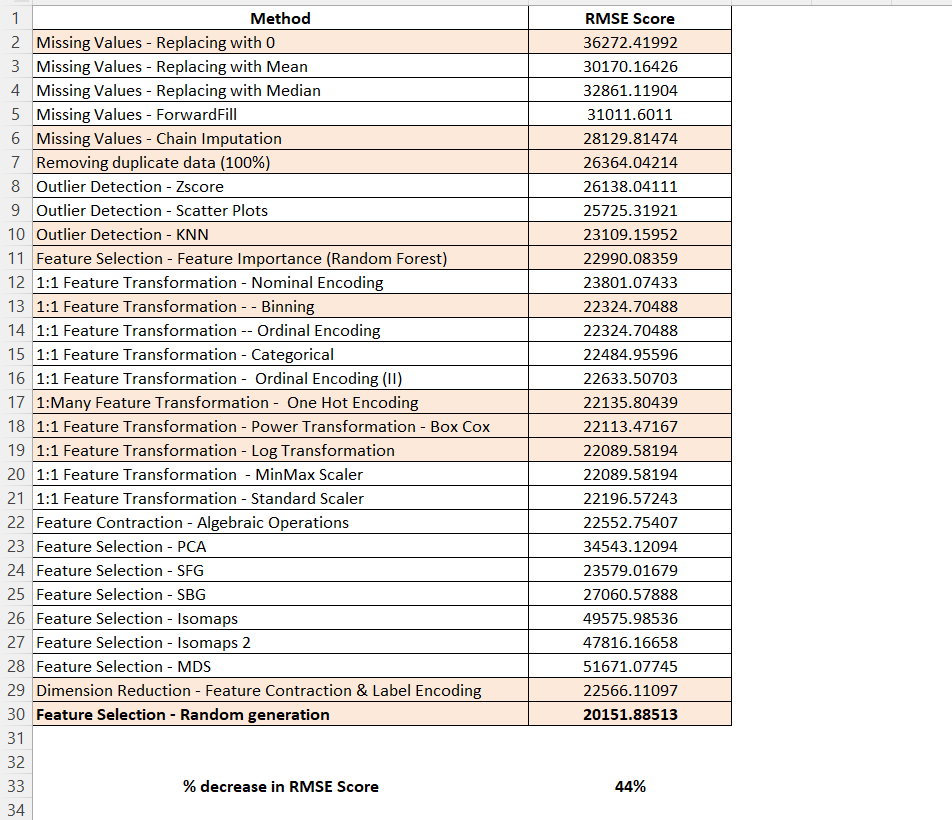

# Conclusion & Summary 

1. **Model Performance Enhancement:**
   - Combinations of different data preparation processes can either improve or reduce the model performance.

2. **Baseline Selection:**
   - The highlighted cells served as the baseline for the next steps. The methods that gave the best results were chosen.
   - For example, replacing data with the mean reduced error, but Chain Imputation provided the best results. Consequently, that dataset was selected for subsequent steps.

3. **Uniqueness of Data-Oriented Problems:**
   - Every data-oriented problem is unique and has its own solutions, but the key steps are usually the same.

4. **Efficiency and Understanding:**
   - Following the steps of data preparation can help increase efficiency, aiding in a better understanding of the data and ultimately improving model performance.

5. **Categorical Variables and Dataset Size:**
   - The dataset, with only 1400 rows and more than 70 columns, included many categorical variables.
   - For instance, House Type, which likely impacts prices, could have been used. However, attempts using one-hot encoding or ordinal encoding degraded model performance, possibly due to more than 5 categories and the small size of the dataset.
   - As a result, focus was primarily on numeric columns.

6. **Complex Methods Evaluation:**
   - Complex methods like PCA and Isomaps were employed to reduce the number of features extensively.
   - However, they were not useful in improving model performance. Despite trying different values of 'n,' simpler methods consistently provided better results.
